slope: 1.6303176172822363e-05
intercept: 51.839664229038064


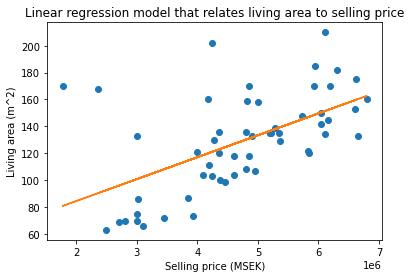

In [3]:
import matplotlib.pyplot as pyplot
import pandas as pd
import numpy as np
import statistics 

# Read the csv-file with GDP and extract the data for the chosen year
df = pd.read_csv("./datasets/data_assignment2.csv")
la_code = 'Living_area'
sp_code = 'Selling_price'


la_sp_df = df[[la_code, sp_code]]

# Get gdp and co2 from joined dataframe and set to x and y values
xValues = la_sp_df[sp_code]

yValues = la_sp_df[la_code]

# Plot the arrays
pyplot.plot(xValues, yValues, 'o')

# Make a linear fit to the data
m, b = np.polyfit(xValues, yValues, 1)

# Plot the line
pyplot.plot(xValues, m*xValues + b)
print("slope: " +str(m))
print("intercept: " + str(b))

# Set up labels and title for the plot
pyplot.xlabel('Selling price (MSEK)')
pyplot.ylabel('Living area (m^2)')
pyplot.title("Linear regression model that relates living area to selling price")
# Set a variable fig to point to the current figure (the scatter plot)
fig = pyplot.gcf()

# Draw and show the plot
pyplot.draw()
pyplot.show()
# Save the current figure into a png image with the name scatterplot
fig.savefig("linear_livingselling")




In [39]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sn
import sklearn

# Import iris dataset
iris = load_iris()
print(iris.keys())

iris_df = pd.DataFrame(iris.data)

iris_df.columns = iris.feature_names

#print(iris_df.head())

X = iris.data
# Dependent variable, can take the value 1 with a probability of success q
Y = iris.target 

# Split into test and train sets, 75% in train and 25% in test
X_train,X_test,Y_train,Y_test=sklearn.model_selection.train_test_split(X,Y,test_size=0.25,random_state=2)


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


0.9736842105263158
[[16  0  0]
 [ 0 10  1]
 [ 0  0 11]]


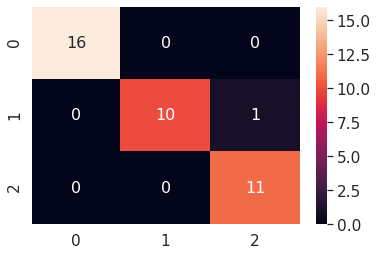

In [40]:
lorg = LogisticRegression(random_state=0)
lorg.fit(X_train, Y_train)

Y_pred = lorg.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
print(accuracy_score(Y_test, Y_pred))

print(cm)

df_cm = pd.DataFrame(cm, range(3), range(3))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

fig = pyplot.gcf()

# Draw and show the plot
pyplot.draw()
pyplot.show()
# Save the current figure into a png image with the name scatterplot
fig.savefig("CM")

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
